This program attempts to optimize a users portfolio using the Efficient Frontier

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get the stock symbols/ tickers in the portfolio
assets = ['FB','AMZN','AAPL','NFLX','GOOG',]

In [3]:
# Assign weights to stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])


In [4]:
# Get the stock starting date
stockStartDate = '2013-01-01'

In [5]:
# Get the stock ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-11-21'

In [6]:
# create a dataframe to store the adjusted close prices of the stock
df = pd.DataFrame()

# Store the adjusted close priceof the stock into the df
for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo',start = stockStartDate,end = today)['Adj Close']

In [7]:
df.head() # Adj Close Prices of all the above stocks

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.926661,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.713015,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.247477,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.151909,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.195379,13.880000,365.280823


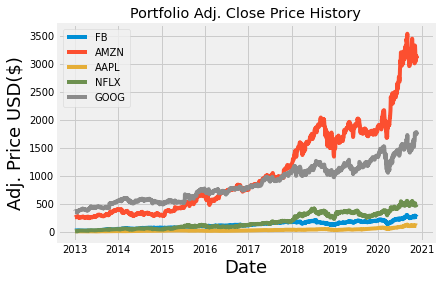

In [8]:
# Visually show all the stocks
title = "Portfolio Adj. Close Price History"

# Get the stocks
my_stocks = df

# Create and plot the graph

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label =c)
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD($)', fontsize =18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [9]:
# Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-11-16,0.007258,0.000719,0.008720,-0.007746,0.002454
2020-11-17,-0.014196,0.001469,-0.007564,0.003193,-0.006304
2020-11-18,-0.011018,-0.009631,-0.011391,0.002414,-0.013202


In [10]:
# Create and show the annualized covariance matrix - 252 is the no. of trading days this year
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

# Main diagonal line shoes the variance , while other elements show the covariance btw 2 stocks
# Since all are online companies there co-variance are +v
# Square root of variance is - volatility

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.119584,0.055535,0.045035,0.056926,0.050722
AMZN,0.055535,0.094919,0.040082,0.063856,0.048201
AAPL,0.045035,0.040082,0.081835,0.035187,0.038841
NFLX,0.056926,0.063856,0.035187,0.212593,0.049073
GOOG,0.050722,0.048201,0.038841,0.049073,0.066439


In [11]:
# Calculate the portfolio Variance -T means Transpose
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.0616915038813682

In [12]:
np.dot(cov_matrix_annual,weights)

array([0.06556048, 0.06051872, 0.0481959 , 0.08352713, 0.05065529])

In [13]:
# Calculate the portfolio Volatility aka std Dev
port_volatility = np.sqrt(port_variance)
port_volatility

0.24837774433585671

In [14]:
#Calculate the Annual Portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3581172226838558

In [15]:
# Show the expected annual return volaitility(risk) and varaince

percent_var = str(round(port_variance,2)*100) + '%'
percent_vols = str(round(port_volatility,2)*100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2)*100) + '%'

print('Expected annual return:' + percent_ret)
print('Annual volatility risk ' + percent_vols)
print('Annual Variance ' + percent_var)

Expected annual return:36.0%
Annual volatility risk 25.0%
Annual Variance 6.0%


In [16]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.6MB/s 


In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

Investors study historical return data when trying to forecast future returns or to estimate how a security might react in a situation. Calculating the historical return is done by subtracting the most recent price from the oldest price and divide the result by the oldest price.

In [21]:
# Portfolio Optimization !
# Calculate the expected returns and the annualised sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


OrderedDict([('FB', 0.0966), ('AMZN', 0.31343), ('AAPL', 0.2476), ('NFLX', 0.34237), ('GOOG', 0.0)])
Expected annual return: 41.7%
Annual volatility: 27.5%
Sharpe Ratio: 1.44


(0.41650838067217394, 0.2748656355267739, 1.4425534858596434)

In [24]:
#Get the discrete allocation of each share per stock
# If you have 15000$ then allocate like the result below
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'FB': 5, 'AMZN': 2, 'AAPL': 26, 'NFLX': 9}
Funds remaining: $7.70
